### Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns, h5py 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import zscore
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
tf.random.set_seed(1)
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
from tensorflow.keras import optimizers
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
import warnings
warnings.filterwarnings("ignore")

In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
import seaborn as sns, h5py
path = '/content/drive/MyDrive/AI_Projects/NN Project Data - Signal.csv'
df = pd.read_csv(path)

In [267]:
df.shape

(1599, 12)

### Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [268]:
percentage_missing = df.isnull().sum() * 100 / len(df)
percentage_missing

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [269]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [270]:
len(df)-len(df.drop_duplicates())

240

In [271]:
df.drop_duplicates(inplace = True)

In [272]:
df.shape

(1359, 12)

### Part A - Q1 D - Visualise distribution of the target variable.

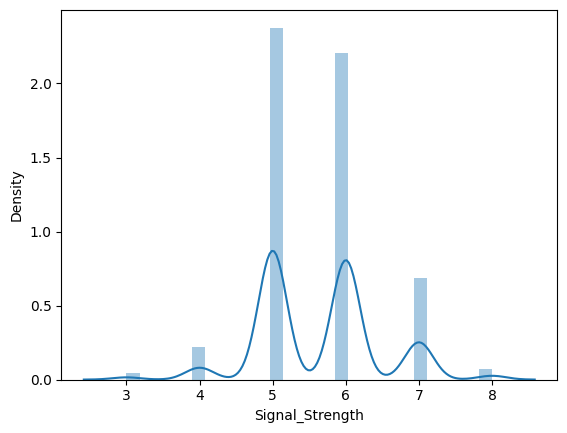

In [273]:
sns.distplot(df['Signal_Strength'], kde = True)
plt.show()

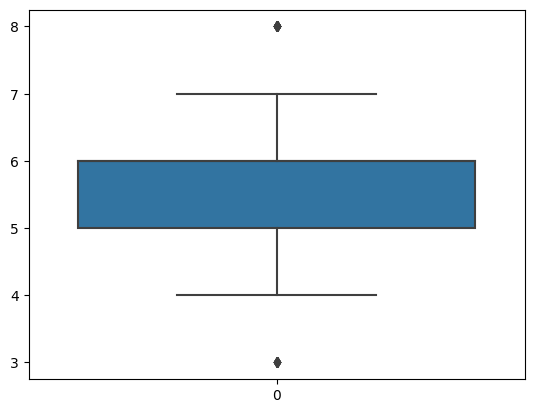

In [274]:
sns.boxplot(df['Signal_Strength'])
plt.show()

#### Part A Q1 E: Share insights from the initial data analysis (at least 2)

<li> Signal strength is highly distributed for parameters 5 and 6
<li> Parameter 3 and 8 are the outliers

#### Part A Q2 A-Split the data into X & Y.

In [275]:
x = df.drop('Signal_Strength',axis=1)     
y = df['Signal_Strength']  

In [276]:
x.shape

(1359, 11)

In [277]:
y.shape

(1359,)

### Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#### Part A - Q2 C-Print shape of all the 4 variables and verify if train and test data is in sync

In [279]:
x_train.shape

(951, 11)

In [280]:
y_train.shape

(951,)

In [281]:
x_test.shape

(408, 11)

In [282]:
y_train.shape

(951,)

In [283]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

69.98% data is in training set
30.02% data is in test set


### Part A - Q2 D - Normalise the train and test data with appropriate method.

In [284]:
xtrain_z = stats.zscore(x_train)


In [285]:
xtest_z = stats.zscore(x_test)


#### Part A - Q2 E - Transform Labels into format acceptable by Neural Network

In [286]:
num_classes = 11
y_train1 = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test,num_classes)
y_test_cat[3]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### Part A - Q3 A - Design a Neural Network to train a classifier.


In [287]:
epochs = 50
learning_rate = 0.0001  
adam = optimizers.Adam(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-8)
input_dim = xtrain_z.shape[1]
sv_model_lr = Sequential()
sv_model_lr.add(Flatten())
sv_model_lr.add(Dense(128, input_dim = input_dim))
sv_model_lr.add(Activation('relu'))
sv_model_lr.add(Dense(128, input_dim = input_dim))
sv_model_lr.add(Activation('relu'))
sv_model_lr.add(Dense(128, input_dim = input_dim))
sv_model_lr.add(Activation('relu'))
sv_model_lr.add(Dense(128, input_dim = input_dim))
sv_model_lr.add(Activation('relu'))
sv_model_lr.add(Dense(num_classes))
sv_model_lr.add(Activation('softmax'))
sv_model_lr.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

### Part A - Q3 B - Train the classifier using previously designed Architecture

In [288]:
history=sv_model_lr.fit(xtrain_z, y_train1,validation_split=0.2,epochs=50, batch_size=32,verbose=1)

Epoch 1/50
24/24 [==============================] - 2s 14ms/step - loss: 2.2931 - accuracy: 0.3487 - val_loss: 2.1889 - val_accuracy: 0.4241
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 2.0578 - accuracy: 0.4421 - val_loss: 1.9462 - val_accuracy: 0.4293
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.7680 - accuracy: 0.4487 - val_loss: 1.6755 - val_accuracy: 0.4450
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 1.4816 - accuracy: 0.4776 - val_loss: 1.4842 - val_accuracy: 0.5236
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 1.2888 - accuracy: 0.5592 - val_loss: 1.3889 - val_accuracy: 0.5026
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1950 - accuracy: 0.5855 - val_loss: 1.3434 - val_accuracy: 0.5183
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 1.1397 - accuracy: 0.5711 - val_loss: 1.2981 - val_accuracy: 0.5236
Epoch 8/50
24/24 [=

### Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy


13/13 [==============================] - 0s 1ms/step - loss: 1.2118 - accuracy: 0.5515


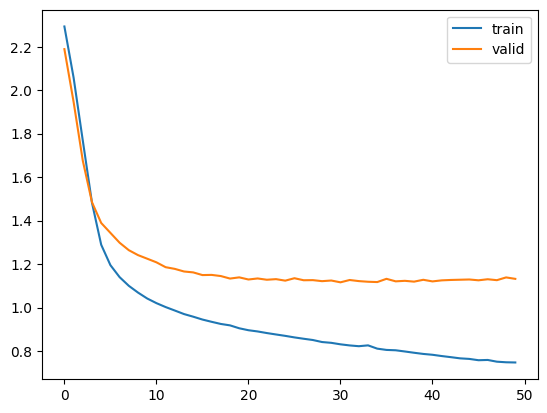

In [289]:
# learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy 
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# results
results = sv_model_lr.evaluate(xtest_z, y_test_cat)


### Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.


In [290]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [291]:
epochs = 50
learning_rate = 0.0001   
adam = optimizers.Adam(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-8)
input_dim = xtrain_z.shape[1]
sv_model_lr1 = Sequential()
sv_model_lr1.add(Flatten())
sv_model_lr1.add(Dense(128, input_dim = input_dim))
sv_model_lr1.add(Activation('relu'))
sv_model_lr1.add(Dense(128, input_dim = input_dim))
sv_model_lr1.add(Activation('relu'))
sv_model_lr1.add(Dense(128, input_dim = input_dim))
sv_model_lr1.add(Activation('relu'))
sv_model_lr1.add(Dense(128, input_dim = input_dim))
sv_model_lr1.add(Activation('relu'))
sv_model_lr1.add(Dense(num_classes))
sv_model_lr1.add(Activation('softmax'))
sv_model_lr1.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [292]:
history1=sv_model_lr1.fit(xtrain_z, y_train1,validation_split=0.2,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 9ms/step - loss: 0.6474 - accuracy: 0.0947 - val_loss: 0.6201 - val_accuracy: 0.0995
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.1961 - val_loss: 0.5470 - val_accuracy: 0.2356
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.3526 - val_loss: 0.4418 - val_accuracy: 0.3927
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.4974 - val_loss: 0.3311 - val_accuracy: 0.4188
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.4974 - val_loss: 0.2594 - val_accuracy: 0.4764
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.5566 - val_loss: 0.2275 - val_accuracy: 0.5183
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2024 - accuracy: 0.5566 - val_loss: 0.2137 - val_accuracy: 0.5393
Epoch 8/50
24/24 [==

### Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.


13/13 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.5539


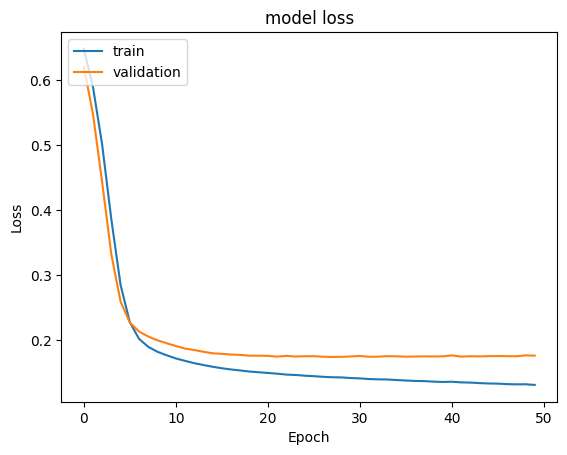

In [293]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
results1 = sv_model_lr1.evaluate(xtest_z, y_test_cat)
plt.show()


#### Insights
<li> The loss for the first model was 1.2118 and accuracy was 0.5515.
<li> The loss value got reduced from 1.2118 to 0.1764 and accuracy became 0.5539

### Part B - Q1 A - Read the .h5 file and assign to a variable.


In [294]:
path1 = '/content/drive/MyDrive/AI_Projects/Autonomous_Vehicles_SVHN_single_grey1.h5'
df1 = h5py.File(path1, 'r')

### Part B - Q1 B - Print all the keys from the .h5 file.

In [295]:
print(df1.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


### Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test


In [296]:
X_trainb = df1['X_train'][:]
y_trainb = df1['y_train'][:]
X_valb = df1['X_val'][:]
y_valb = df1['y_val'][:]
X_testb = df1['X_test'][:]
y_testb = df1['y_test'][:]
df1.close()

### Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [297]:
print('Training set', X_trainb.shape, y_trainb.shape)
print('Test set', X_testb.shape, y_testb.shape)
print('Validation set', X_valb.shape, y_valb.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)
Validation set (60000, 32, 32) (60000,)


### Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.

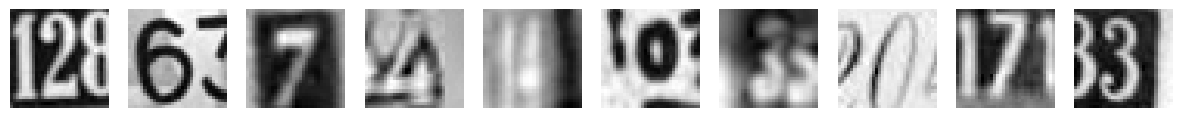

Corresponding labels:[2 6 7 4 4 0 3 0 7 3]


In [298]:
plt.figure(figsize = (15, 4.5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_trainb[i].reshape((32, 32)),cmap = "gray")
    plt.axis('off')

plt.show()
print('Corresponding labels:%s' % (y_trainb[0 : 10]))

### Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.


In [299]:
X_trainb = X_trainb.reshape(X_trainb.shape[0], 1024, 1)
X_testb = X_testb.reshape(X_testb.shape[0], 1024, 1)
X_valb = X_valb.reshape(X_valb.shape[0], 1024, 1)

In [300]:
print('Resized Training set feature shape = ', X_trainb.shape, y_trainb.shape)
print('Resized Test set feature shape = ', X_testb.shape, y_testb.shape)
print('Resized Validation set feature shape = ', X_valb.shape, y_valb.shape)

Resized Training set feature shape =  (42000, 1024, 1) (42000,)
Resized Test set feature shape =  (18000, 1024, 1) (18000,)
Resized Validation set feature shape =  (60000, 1024, 1) (60000,)


#### Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [301]:
print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*45)
X_trainb /= 255
X_valb /= 255
X_testb /= 255

Normalizing the RGB codes by dividing it to the max RGB value
------------------------------------------------------------------------------------------


### Part B - Q2 E - Transform Labels into format acceptable by Neural Network


In [302]:
num_classes = 10
y_train2 = tf.keras.utils.to_categorical(y_trainb, num_classes = num_classes)
y_test2 = tf.keras.utils.to_categorical(y_testb, num_classes = num_classes)
y_val2 = tf.keras.utils.to_categorical(y_valb, num_classes = num_classes)

print('Training set:', y_train2.shape)
print('Test set:', y_test2.shape)
print('Validation set:', y_val2.shape)

Training set: (42000, 10)
Test set: (18000, 10)
Validation set: (60000, 10)


### Part B - Q2 F - Print total Number of classes in the Dataset.


In [303]:
print('Unique labels in y_train:', np.unique(y_train2))
print('Unique labels in y_val:', np.unique(y_val2))
print('Unique labels in y_test:', np.unique(y_test2))

Unique labels in y_train: [0. 1.]
Unique labels in y_val: [0. 1.]
Unique labels in y_test: [0. 1.]


### Part B - Q3 A - Design a Neural Network to train a classifier.


##### Weight Initialization

In [304]:
# from now on, create a function to generate (return) models
def nn_model():
    model = Sequential() 
    model.add(Dense(50, input_shape = (X_trainb.shape[1],), kernel_initializer='he_normal'))   
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                           
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [305]:
model = nn_model()
history = model.fit(X_trainb, y_train2, batch_size=200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 6ms/step - loss: 2.6362 - accuracy: 0.0999
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.4968 - accuracy: 0.0999
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.4163 - accuracy: 0.0999
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3681 - accuracy: 0.0999
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3394 - accuracy: 0.0999
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3228 - accuracy: 0.0999
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3134 - accuracy: 0.0999
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3083 - accuracy: 0.0994
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3055 - accuracy: 0.0988
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3041 - accura

In [306]:
results = model.evaluate(X_testb, y_test2)

563/563 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.0953


In [307]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09533333033323288


##### Activation Function

In [308]:
def nn_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (X_trainb.shape[1],)))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [309]:
model = nn_model()
history = model.fit(X_trainb, y_train2, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3044 - accuracy: 0.1099
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2987 - accuracy: 0.1238
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.2959 - accuracy: 0.1349
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.2928 - accuracy: 0.1442
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 2.2890 - accuracy: 0.1549
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.2841 - accuracy: 0.1663
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.2781 - accuracy: 0.1787
Epoch 8/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2709 - accuracy: 0.1912
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.2621 - accuracy: 0.2038
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.250

In [310]:
results = model.evaluate(X_testb, y_test2)

563/563 [==============================] - 1s 1ms/step - loss: 2.2421 - accuracy: 0.2249


In [311]:
print('Test accuracy: ', results[1])

Test accuracy:  0.22494444251060486


##### Batch normalization

In [312]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [313]:
def nn_model():
    model = Sequential()   
    model.add(Dense(50, input_shape = (X_trainb.shape[1],)))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [314]:
model = nn_model()
history = model.fit(X_trainb, y_train2, epochs = 20, verbose = 1)

Epoch 1/20
1313/1313 [==============================] - 4s 2ms/step - loss: 2.3772 - accuracy: 0.1341
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 2.1368 - accuracy: 0.2322
Epoch 3/20
1313/1313 [==============================] - 3s 3ms/step - loss: 1.9440 - accuracy: 0.3264
Epoch 4/20
1313/1313 [==============================] - 3s 2ms/step - loss: 1.7912 - accuracy: 0.4012
Epoch 5/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6658 - accuracy: 0.4540
Epoch 6/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5678 - accuracy: 0.4968
Epoch 7/20
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4835 - accuracy: 0.5291
Epoch 8/20
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4141 - accuracy: 0.5515
Epoch 9/20
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3575 - accuracy: 0.5712
Epoch 10/20
1313/1313 [==============================] - 3s 2ms/step - loss: 1.310

In [315]:
results = model.evaluate(X_testb, y_test2)

563/563 [==============================] - 1s 1ms/step - loss: 1.0766 - accuracy: 0.6523


In [316]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6522777676582336


#### Dropout

In [317]:
def nn_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (X_trainb.shape[1],), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

#### Part B- Q3 B -Train the classifier using previously designed Architecture (Use best suitable parameters)

In [318]:
model_final = nn_model()
history_final = model_final.fit(X_trainb, y_train2, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 6s 3ms/step - loss: 2.1776 - accuracy: 0.1991
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.7741 - accuracy: 0.3646
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6019 - accuracy: 0.4440
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5008 - accuracy: 0.4880
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.4476 - accuracy: 0.5102
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4060 - accuracy: 0.5303
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3669 - accuracy: 0.5451
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.3263 - accuracy: 0.5664
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2973 - accuracy: 0.5788
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.276

In [319]:
results = model_final.evaluate(X_testb, y_test2)

563/563 [==============================] - 1s 1ms/step - loss: 1.0627 - accuracy: 0.6654


In [320]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6653888821601868


#### Part B - Q3 C -Evaluate performance of the model with appropriate metrics.

In [321]:
y_pred = model_final.predict(X_testb)
y_pred

563/563 [==============================] - 1s 1ms/step


array([[6.54923096e-02, 3.15763280e-02, 1.20274805e-01, ...,
        4.82647941e-02, 1.12633020e-01, 3.60925734e-01],
       [2.85920571e-03, 8.71159881e-03, 4.97545421e-01, ...,
        4.41156089e-01, 1.31541686e-02, 6.42977562e-03],
       [7.56298797e-03, 5.60346618e-03, 7.99231768e-01, ...,
        5.97324669e-02, 1.29601303e-02, 2.09578928e-02],
       ...,
       [6.04027649e-04, 1.16708532e-01, 2.34858226e-02, ...,
        8.42978656e-01, 4.53361310e-04, 2.78738770e-03],
       [1.64737757e-02, 1.33324722e-02, 2.47823615e-02, ...,
        1.13033531e-02, 6.27806261e-02, 6.97893918e-01],
       [3.26996529e-03, 9.66397487e-03, 8.48891139e-01, ...,
        7.32423142e-02, 1.29559804e-02, 2.43585370e-02]], dtype=float32)

In [322]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_testb) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test2, axis=1)
cm = confusion_matrix(y_testb, y_pred)
print(cm)

563/563 [==============================] - 1s 1ms/step
[[1114  129   35   52   18   17   71   76  147  155]
 [  20 1450   21   44   37   15   20  122   69   30]
 [  14   83 1209   49   30   15   12  257   62   72]
 [  16  107   72  972   15  171   16  117  192   41]
 [  35  174   35   20 1226   21   84   33  123   61]
 [  29   78   31  116   17  934  101   42  303  117]
 [  60   68   18   20   50   49 1015   29  479   44]
 [  12  109   91   22    9   13    7 1433   54   58]
 [  59  116   45   33   32   60  121   36 1214   96]
 [ 102  126   53   37   20   55   24   79  134 1174]]


In [323]:
from sklearn.metrics import classification_report

print('Classification Report'); print('--'*40)
print(classification_report(y_testb, y_pred))

Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1814
           1       0.59      0.79      0.68      1828
           2       0.75      0.67      0.71      1803
           3       0.71      0.57      0.63      1719
           4       0.84      0.68      0.75      1812
           5       0.69      0.53      0.60      1768
           6       0.69      0.55      0.61      1832
           7       0.64      0.79      0.71      1808
           8       0.44      0.67      0.53      1812
           9       0.64      0.65      0.64      1804

    accuracy                           0.65     18000
   macro avg       0.68      0.65      0.65     18000
weighted avg       0.68      0.65      0.65     18000



### Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.


In [324]:
import keras
from matplotlib import pyplot as plt

history = model_final.fit(X_trainb, y_train2, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2436 - accuracy: 0.6008
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2350 - accuracy: 0.6091
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2126 - accuracy: 0.6147
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2023 - accuracy: 0.6221
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1852 - accuracy: 0.6255
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1820 - accuracy: 0.6287
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1657 - accuracy: 0.6334
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1611 - accuracy: 0.6334
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1576 - accuracy: 0.6317
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.144

In [325]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

KeyError: ignored

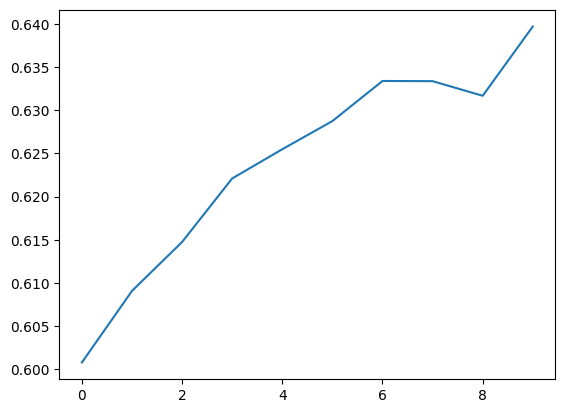

In [326]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KeyError: ignored

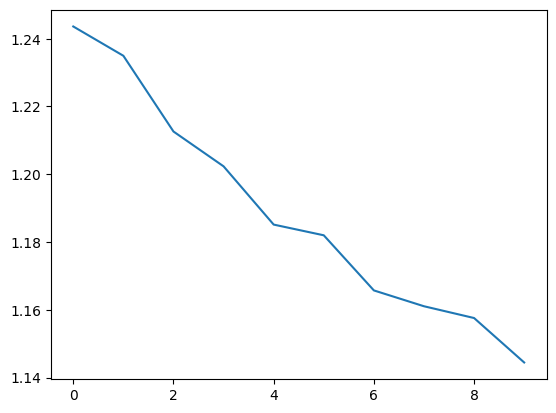

In [327]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Observations
<li> Initially the accuracy was very low (17%) and it got improved to 65% after dropout. Further improvement of accuracy can be done by using hypertuning techniques.
<li> The Training accuracy and loss are plotted with respect to epoches.
Note: The validatio accuracy and loss are not available due to the unavailability of keywords.